# 7.3 신경망 모델 훈련

목적: 인공 신경망 모델을 훈련하는 모범사례와 필요 도구 확인

In [1]:
# 손실 곡선

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
def model_fn(a_layer=None):

    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation="relu"))

    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

In [3]:
model = model_fn()
model.summary()

Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2025-04-19 18:40:38.108591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-19 18:40:38.108757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.compile(
    loss="sparse_categorical_crossentropy"
    , metrics="accuracy"
    )
    
history = model.fit(  # history 변수에 훈련 측정 값이 담겨 있음
        train_scaled
        , train_target
        , epochs=5
        , verbose=0
        )  


2025-04-19 18:40:38.282366: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-04-19 18:40:38.476811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


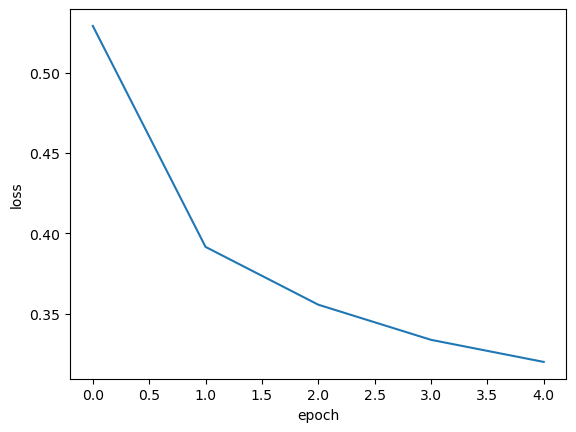

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

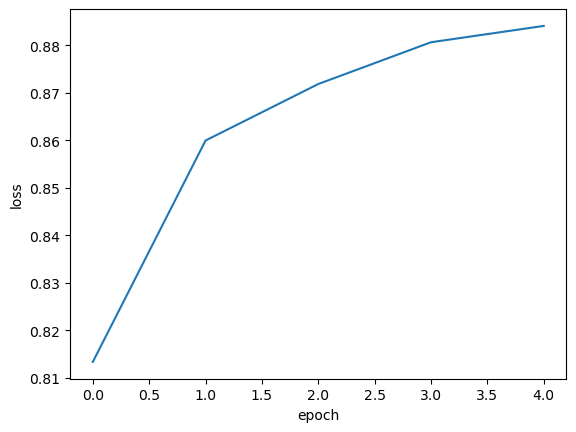

In [7]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

2025-04-19 18:40:58.675296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


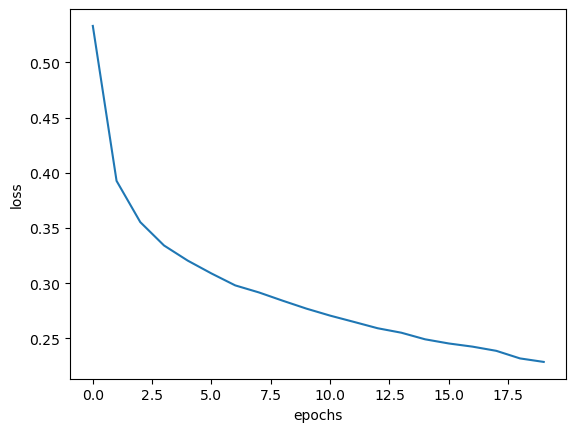

In [8]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [9]:
# 검증 손실

model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

2025-04-19 18:42:13.668767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-19 18:42:17.700198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


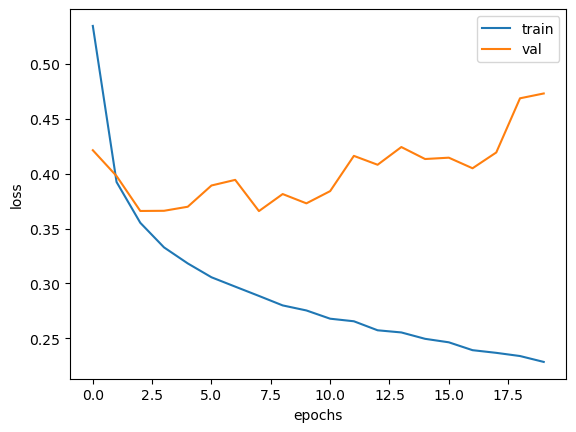

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

검증 세트의 loss가 증가하고, 훈련 세트는 꾸준히 감소하는 경향을 보인다. 이는 전형적인 과대적합 모델 이다. 

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.

In [12]:
# 과대적합을 막는 방법으로 규제를 하는 대신 옵티마이저 하이퍼파라미터를 통해 과대적합을 완화

model = model_fn()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

2025-04-19 18:43:42.574427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2025-04-19 18:43:46.008385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


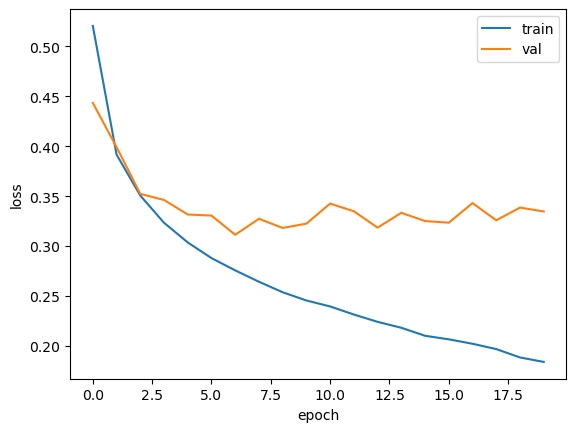

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [14]:
# keras.optimizers.Adam(0.001)

model = model_fn()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

2025-04-19 18:45:02.145012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2025-04-19 18:45:05.593153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


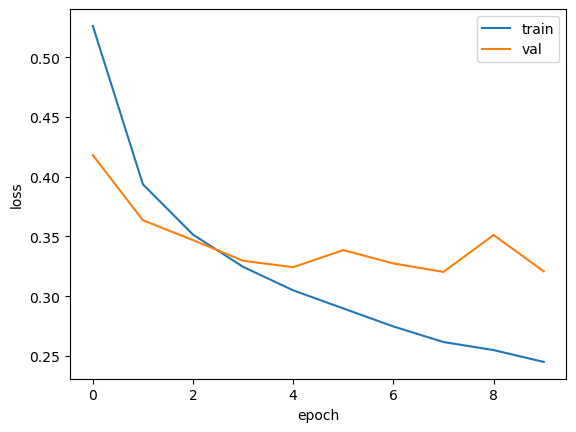

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [16]:
# 드랍아웃

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

2025-04-19 18:45:42.347482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2025-04-19 18:45:46.095696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


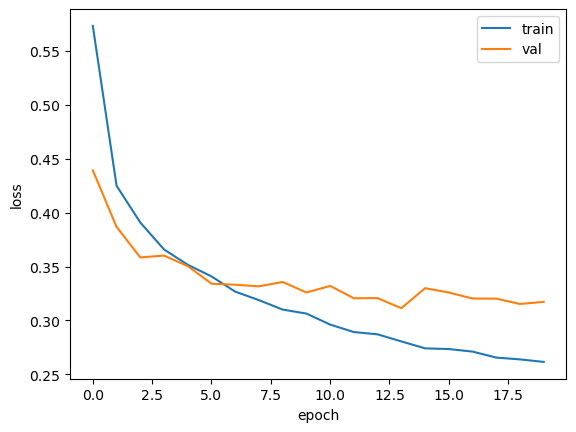

In [18]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [19]:
#  모델 저장과 복원

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

2025-04-19 18:47:07.771309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-19 18:47:11.475657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [20]:
model.save_weights("model-weights.h5")

In [21]:
model.save("model-whole.h5")

In [22]:
!ls -al *.h5

-rw-r--r--@ 1 jewonkim  staff  333448 Apr 19 18:47 model-weights.h5
-rw-r--r--@ 1 jewonkim  staff  982664 Apr 19 18:47 model-whole.h5


In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5") # 모델이 같은 구조를 가져야 파라미터를 불러올 수 있다.

In [24]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=1)
print(np.mean(val_labels == val_target))

209/375 [===============>..............] - ETA: 0s

2025-04-19 18:47:50.598747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 0s 701us/step


0.8788333333333334


In [25]:
print(val_labels)

[8 8 7 ... 8 8 0]


In [26]:
model = keras.models.load_model("model-whole.h5")
model.evaluate(val_scaled, val_target)

  1/375 [..............................] - ETA: 28s - loss: 0.2025 - accuracy: 0.9062

 63/375 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8869

2025-04-19 18:47:51.034948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8788


[0.3344060778617859, 0.8788333535194397]

###  콜백

콜백(callback)은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들이다.

fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.<br>
여기서 사용할 ModelCheckPoint 콜백은 기본적으로 에포크마다 모델을 저장한다.

In [34]:
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델을 저장하고, 저장될 파일 이름을 'best-model.h5'로 지정

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only=True)

model.fit(
    train_scaled, train_target, 
    epochs=20, verbose=0, 
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb]
    )

2025-04-19 18:59:21.462503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-19 18:59:25.203040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [35]:
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

 64/375 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8960

2025-04-19 19:01:14.817800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.8871


[0.3134244382381439, 0.8870833516120911]

그래도 위와 같은 방법은 여전히 20번의 에포크 동안 훈련을 한다. <br> 
검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다. <br>
이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있는데 이렇게 과대적합이 시작되기 전에 이미 중짛나는 것을 "조기 종료(early stopping)"이라 하고, 딥러닝 분야에 널리 사용된다.

In [38]:
# Keras의 EarylyStopping 콜백 사용해보기

model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy",
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2 # 2번 연속 검증 점수가 향상되지 않으면 훈련 종료
    , restore_best_weights=True  # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
    )

history = model.fit(
    train_scaled, train_target
    , epochs=20, verbose=0
    , validation_data=(val_scaled, val_target)
    , callbacks=[checkpoint_cb, early_stopping_cb]
)

2025-04-19 19:11:29.441311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-19 19:11:33.746391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [39]:
# 실제 멈춘 에프크
print(early_stopping_cb.stopped_epoch)

9


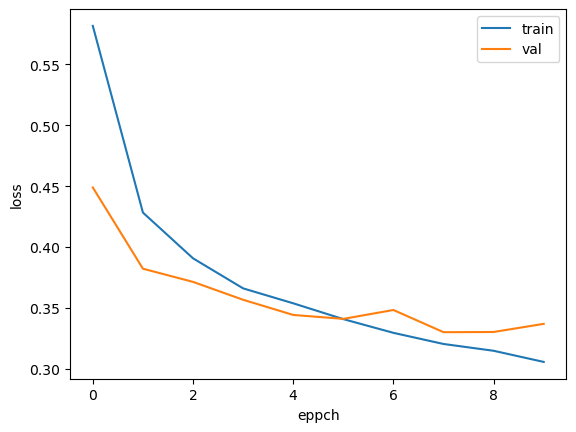

In [42]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("eppch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8823


[0.3301592767238617, 0.8823333382606506]